<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/05_projects/Fraud%20Detection/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection using Machine Learning

In this project, we build a model to detect fraudulent credit card transactions. It's a binary classification problem with imbalanced data.

## Install Dependencies

In [1]:
# Uncomment if using Google Colab
# !pip install pandas scikit-learn matplotlib seaborn joblib

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

sns.set(style="whitegrid")

## Load Dataset

> Get the dataset from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download)

In [7]:
df = pd.read_csv("/content/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


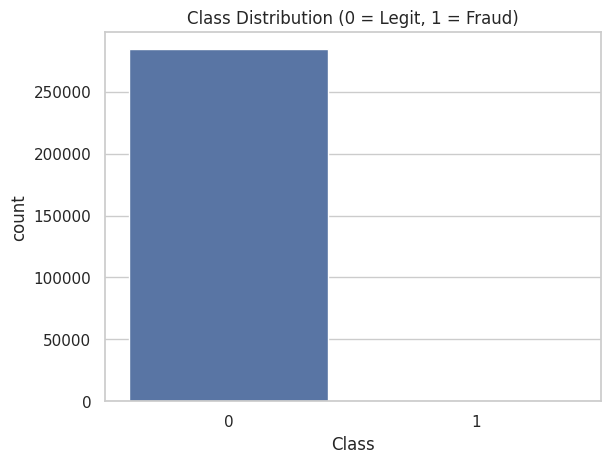

In [8]:
print("Dataset shape:", df.shape)
print(df['Class'].value_counts())

# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

## Preprocessing

In [9]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Train Random Forest Model

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



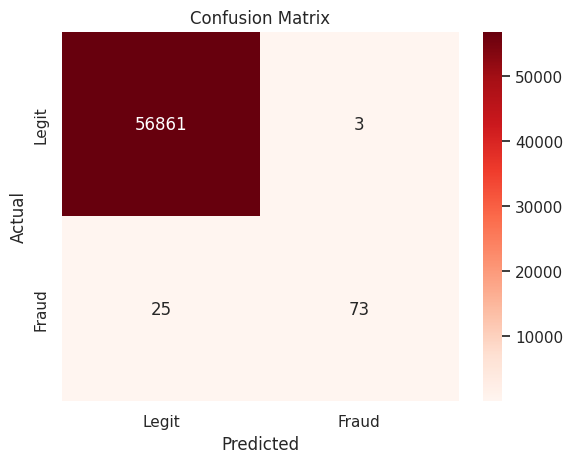

ROC AUC Score: 0.952908497036969


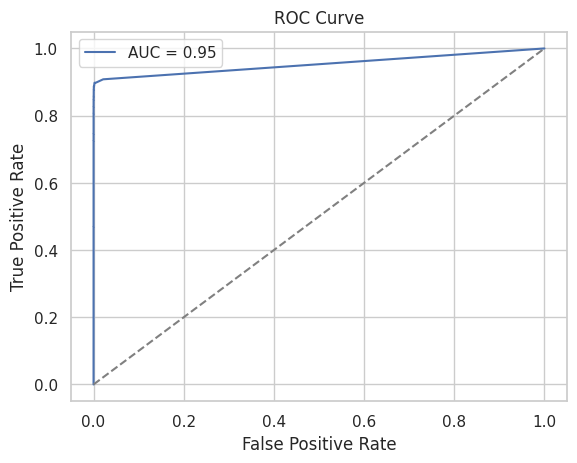

In [11]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC AUC
y_proba = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_score)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Save and Test the Model

In [12]:
# Save model
joblib.dump(model, "fraud_detection_model.pkl")

# Load and test
loaded_model = joblib.load("fraud_detection_model.pkl")
sample = X_test.iloc[0:1]
prediction = loaded_model.predict(sample)
print("Prediction:", "Fraud" if prediction[0] == 1 else "Legit")

Prediction: Legit


## Summary

- Loaded and explored a credit card fraud dataset
- Visualized class imbalance
- Scaled Time and Amount features
- Trained a Random Forest classifier
- Evaluated with classification report and ROC AUC
- Saved and tested the model
